# Sustainable Investing in New York City

Sustainability has become a core principal in businesses desiring the patronage of Millenials and Gen-Xers. When one thinks of sustainability, thoughts of renewable energy and Fair Trade products come to mind. Sustainable homes include using green energy, recycled water, and compostable waste. Sustainable real estate investing follows a similar ethos. It requires that investors not only make a profit, but do so in a way that elevates the community rather than dividing and dispersing it. 

New York City, like many metropoli, has long struggled with displacing long-time residents of neighborhoods when redevelopment occurs. This gentrification too often leads to morally questionable business transactions that benefit real estate developers to the detriment of established residents and only provides high-risk, short-term gains for both building owners and investors.

This analysis will demonstrate the long-term growth potential of such sustainable investing. 

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import pandas.tseries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

df = pd.read_csv('zillow_data.csv')
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [3]:
nyc_df = df[df['Metro']=='New York']
nyc_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
21,61703,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,...,7410100,7422400,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600
35,61802,10462,New York,NY,New York,Bronx,36,154300.0,154300.0,154400.0,...,432800,436100,439900,443500,444100,443900,446000,446400,447200,450200
36,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,...,357900,357100,356500,357200,362000,368500,374100,379800,388100,394400
46,61803,10463,New York,NY,New York,Bronx,47,180100.0,181000.0,181900.0,...,680800,684500,692000,700900,710200,726900,744500,757000,769400,778700
47,62040,11230,New York,NY,New York,Kings,48,230100.0,230800.0,231500.0,...,1079200,1082700,1082800,1084900,1091200,1102400,1120200,1141600,1170000,1195400


# Step 2: Data Preprocessing

In [4]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [5]:
get_datetimes(nyc_df)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [6]:
nyc_df.isnull().sum()

RegionID       0
RegionName     0
City           0
State          0
Metro          0
CountyName     0
SizeRank       0
1996-04       14
1996-05       14
1996-06       14
1996-07       14
1996-08       14
1996-09       14
1996-10       14
1996-11       14
1996-12       14
1997-01       14
1997-02       14
1997-03       14
1997-04       14
1997-05       14
1997-06       14
1997-07       14
1997-08       14
1997-09       14
1997-10       14
1997-11       14
1997-12       14
1998-01       14
1998-02       14
              ..
2015-11        0
2015-12        0
2016-01        0
2016-02        0
2016-03        0
2016-04        0
2016-05        0
2016-06        0
2016-07        0
2016-08        0
2016-09        0
2016-10        0
2016-11        0
2016-12        0
2017-01        0
2017-02        0
2017-03        0
2017-04        0
2017-05        0
2017-06        0
2017-07        0
2017-08        0
2017-09        0
2017-10        0
2017-11        0
2017-12        0
2018-01        0
2018-02       

In [7]:
nyc_df['2005-01']

6         314200.0
10        374800.0
12        610300.0
13        521700.0
20       3762100.0
21       3581100.0
35        324700.0
36             NaN
46        443300.0
47        690100.0
49        669900.0
53        254500.0
57        916900.0
58        474000.0
70        368600.0
72        490500.0
73        328500.0
85        471200.0
95        412600.0
99        491000.0
100       401000.0
106       910600.0
117       443900.0
138       410200.0
140       480700.0
156       872400.0
158       288000.0
187       347100.0
190       326600.0
191       560800.0
           ...    
13484     425100.0
13491     214600.0
13509     472300.0
13535     444900.0
13557     158600.0
13607     316500.0
13691     346900.0
13701     255700.0
13707     372000.0
13731     947200.0
13772     284700.0
13853     577300.0
13864    1312300.0
13900    2408600.0
13911     333500.0
13951     378400.0
14018     482700.0
14074          NaN
14089     155700.0
14170     298800.0
14276     445100.0
14282     22

In [8]:
nyc_df.isna().any()[lambda x: x]
unique, counts = np.unique(nyc_df['RegionName'], return_counts=True)
dict(zip(unique, counts))

{7001: 1,
 7002: 1,
 7003: 1,
 7004: 1,
 7005: 1,
 7006: 1,
 7008: 1,
 7009: 1,
 7010: 1,
 7011: 1,
 7012: 1,
 7013: 1,
 7014: 1,
 7016: 1,
 7020: 1,
 7021: 1,
 7022: 1,
 7023: 1,
 7024: 1,
 7026: 1,
 7027: 1,
 7028: 1,
 7029: 1,
 7030: 1,
 7031: 1,
 7032: 1,
 7033: 1,
 7034: 1,
 7035: 1,
 7036: 1,
 7039: 1,
 7040: 1,
 7041: 1,
 7042: 1,
 7043: 1,
 7044: 1,
 7045: 1,
 7046: 1,
 7047: 1,
 7050: 1,
 7052: 1,
 7054: 1,
 7055: 1,
 7057: 1,
 7058: 1,
 7059: 1,
 7060: 1,
 7062: 1,
 7063: 1,
 7064: 1,
 7065: 1,
 7066: 1,
 7067: 1,
 7068: 1,
 7069: 1,
 7070: 1,
 7071: 1,
 7072: 1,
 7073: 1,
 7074: 1,
 7075: 1,
 7076: 1,
 7077: 1,
 7078: 1,
 7079: 1,
 7080: 1,
 7081: 1,
 7082: 1,
 7083: 1,
 7086: 1,
 7087: 1,
 7088: 1,
 7090: 1,
 7092: 1,
 7093: 1,
 7094: 1,
 7095: 1,
 7103: 1,
 7104: 1,
 7105: 1,
 7106: 1,
 7107: 1,
 7109: 1,
 7110: 1,
 7114: 1,
 7201: 1,
 7202: 1,
 7203: 1,
 7204: 1,
 7205: 1,
 7206: 1,
 7208: 1,
 7302: 1,
 7305: 1,
 7306: 1,
 7307: 1,
 7401: 1,
 7403: 1,
 7405: 1,
 7407: 1,


In [9]:
nyc_df.fillna(value=0)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,0.0,0.0,0.0,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
21,61703,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,...,7410100,7422400,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600
35,61802,10462,New York,NY,New York,Bronx,36,154300.0,154300.0,154400.0,...,432800,436100,439900,443500,444100,443900,446000,446400,447200,450200
36,61796,10456,New York,NY,New York,Bronx,37,0.0,0.0,0.0,...,357900,357100,356500,357200,362000,368500,374100,379800,388100,394400
46,61803,10463,New York,NY,New York,Bronx,47,180100.0,181000.0,181900.0,...,680800,684500,692000,700900,710200,726900,744500,757000,769400,778700
47,62040,11230,New York,NY,New York,Kings,48,230100.0,230800.0,231500.0,...,1079200,1082700,1082800,1084900,1091200,1102400,1120200,1141600,1170000,1195400


As we can see from the above list of zipcodes, there is only one property represented per zipcode. This ensures a balanced analysis, as there is an even number of properties across zipcodes. The downside is that a single property may not be a true representation of an entire zipcode.

# Step 3: EDA and Visualization

As we saw above, some of the zip codes were represented by buildings that were not yet constructed in April 1996 (hence the null values). The next step is to find the top five properties with the largest difference between their original value and their respective values in April 2018. 

In [10]:
top_five_df_1996 = []
for i in nyc_df:
    nyc_df_diff = nyc_df['2018-04'] - nyc_df['1996-04']
    top_five_df_1996.append(nyc_df_diff)

pct_diff_1996 = (nyc_df_diff / nyc_df['1996-04'])
pct_diff_1996.nlargest(5)

117     11.189940
1155    10.535523
475      9.942505
191      9.403061
106      8.941958
dtype: float64

In [11]:
top_five_df_2005 = []
for i in nyc_df:
    nyc_df_diff = nyc_df['2018-04'] - nyc_df['2005-04']
    top_five_df_2005.append(nyc_df_diff)

pct_diff_2005 = (nyc_df_diff / nyc_df['2005-04'])
pct_diff_2005.nlargest(5)

475     2.492899
117     2.372871
1155    2.268325
156     2.166136
1534    2.048191
dtype: float64

In [12]:
top_five_df_2014 = []
for i in nyc_df:
    nyc_df_diff = nyc_df['2018-04'] - nyc_df['2014-04']
    top_five_df_2014.append(nyc_df_diff)

pct_diff_2014 = (nyc_df_diff / nyc_df['2014-04'])
pct_diff_2014.nlargest(5)

660     1.063162
7007    1.012085
475     0.928003
1737    0.922617
190     0.880627
dtype: float64

In [14]:
top_11_pct_diff=nyc_df.loc[['106', '117', '156', '190', '191', '475', '660', '1155', '1534', '1737', '7007']]

plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($) x 10 Billion')
plt.plot(top_11_pct_diff)
plt.show()

KeyError: "None of [['106', '117', '156', '190', '191', '475', '660', '1155', '1534', '1737', '7007']] are in the [index]"

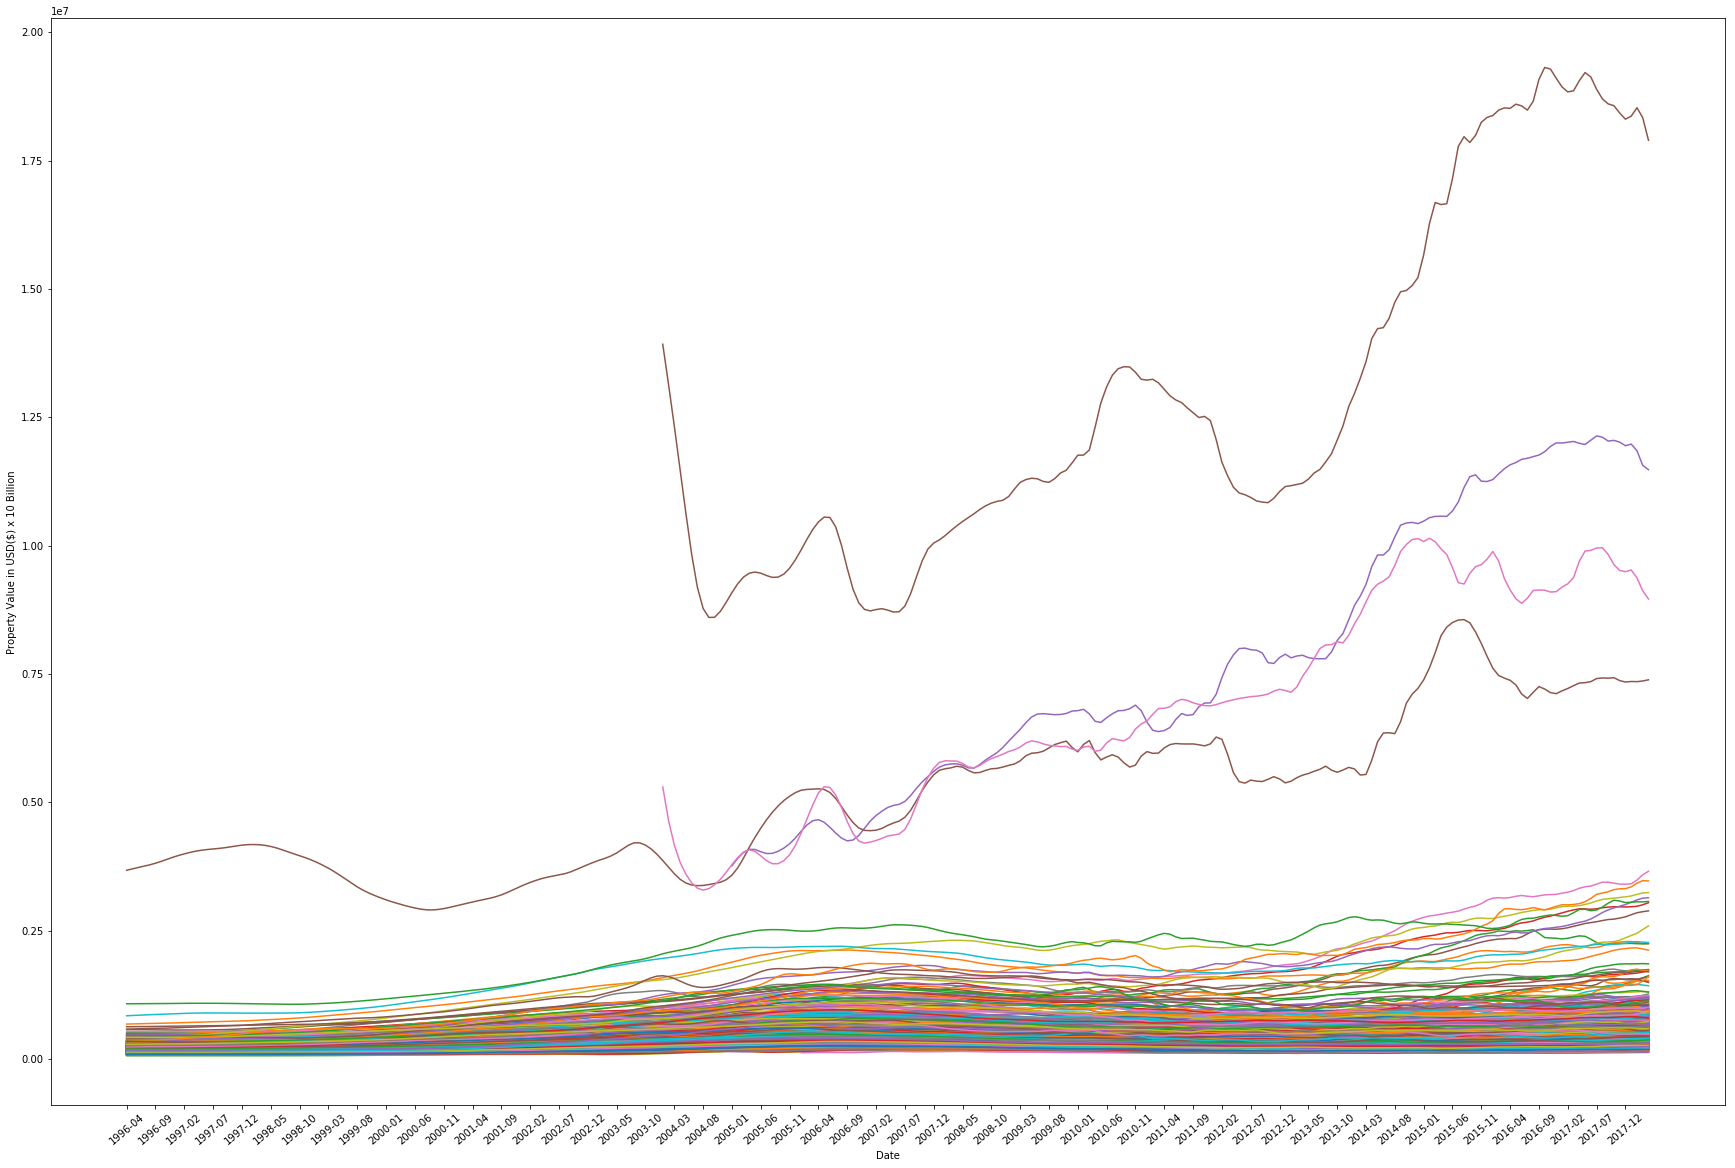

In [9]:
ind_df = (nyc_df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($) x 10 Billion')
plt.plot(ind_df.T)
plt.show()

# Step 4: Reshape from Wide to Long Format

In [10]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True, errors='coerce')
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [11]:
nyc_df.drop(columns=['RegionID'])
ind_dfs = df.apply(melt_data(nyc_df), axis=1)

TypeError: ("'DataFrame' object is not callable", 'occurred at index 0')

In [24]:
nyc_df.drop(columns=['RegionID'])
ind_df = [melt_data(nyc_df[7:]) for row in nyc_df[7:].values]
ind_df

[                    value
 time                     
 1996-04-01  196739.657444
 1996-05-01  196738.603426
 1996-06-01  196731.225296
 1996-07-01  196708.168643
 1996-08-01  196691.567852
 1996-09-01  196704.479578
 1996-10-01  196791.172596
 1996-11-01  196943.873518
 1996-12-01  197318.181818
 1997-01-01  197864.031621
 1997-02-01  198354.150198
 1997-03-01  198690.645586
 1997-04-01  199074.967062
 1997-05-01  199529.512516
 1997-06-01  200021.870883
 1997-07-01  200533.596838
 1997-08-01  201087.088274
 1997-09-01  201692.753623
 1997-10-01  202392.753623
 1997-11-01  203170.092227
 1997-12-01  204182.476943
 1998-01-01  205355.335968
 1998-02-01  206452.173913
 1998-03-01  207392.885375
 1998-04-01  208395.520422
 1998-05-01  209449.670619
 1998-06-01  210541.897233
 1998-07-01  211661.001318
 1998-08-01  212827.404480
 1998-09-01  214049.934124
 ...                   ...
 2015-11-01  504373.445596
 2015-12-01  505892.487047
 2016-01-01  507760.362694
 2016-02-01  509516.321244
 

# Step 5: ARIMA Modeling

In [ ]:
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range('2015-04-01', '2015-08-31')
len(dates)

# store the parameters
error = np.random.normal(0, 4, len(dates))
mu = 7
theta = 0.9

#generate the time series
TS = [None] * len(dates)
error_prev = error[0]
for i, row in enumerate(dates):
    TS[i] = mu + theta * error_prev + error[i]
    error_prev = error[i]

In [ ]:
series = pd.Series(TS, index=dates)
series.plot(figsize=(14,6), linewidth=2, fontsize=14)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

In [ ]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

mod_arma = ARMA(data_diff, order=(2,1))
res_arma = mod_arma.fit()

print(res_arma.summary())

print(res_arma.params)

# Step 6: Interpreting Results